In [345]:
# Anomaly detection for datacenter

You have collected logs of virtual machines working in datacenters (actually, the dataset is a real data from a number of real virtual machines). The logs are CPU load and memory load (RAM) for every VM. Your goal is to build a system detecting abnormal behavior of the VMs so that the system administrator can notice them and pay attention.

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

%matplotlib inline

## Setting up the environment

The log file you are going to work with is `system-load.csv`. You may want to open it
in text editor or Excel to examine its internal structure.

In [347]:
input_filename = "data/datacenter/system-load.csv"

## Loading the data

In [348]:
df_load = pd.read_csv(input_filename)

In [349]:
X_train = df_load.values

Let us take a look at the dataset.

In [350]:
df_load.head(5)

,cpu_load,ram_usage
0,1.29,290.0
1,2.66,332.0
2,0.88,372.0
3,2.57,362.0
4,2.44,480.0


In [351]:
X_train[:5]

array([[  1.29, 290.  ],
       [  2.66, 332.  ],
       [  0.88, 372.  ],
       [  2.57, 362.  ],
       [  2.44, 480.  ]])

## Setting up model parameters

Set up the number of Gaussians and abnormality threshold. Note, there are no labels for the points
in this dataset. We do not know which (if any) servers behaving abnormally. Think how would you
decide on the threshold. Visualizing the results could help.

In [352]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=1, covariance_type='full', tol=.05)

## Training Gaussian mixture model


Train Gaussian mixture model on the datacenter data.

In [353]:
clf.fit(X_train)

GaussianMixture(n_components=2, tol=0.05)

## Plotting the results

Visualize all the points from the dataset and density estimation of your model over them.
Draw all abnormal points (falling below the threshold) in red.

<ipython-input-354-5840d8d6c419>:12: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


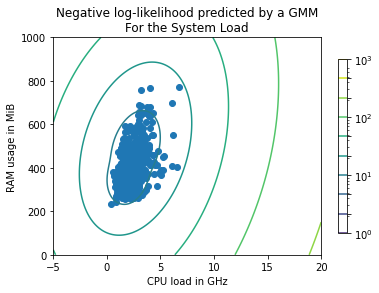

In [354]:
# display predicted scores by the model as a contour plot
x = np.linspace(-5., 20., 1000)
y = np.linspace(0., 1000., 1000)

X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=X_train.min(), vmax=X_train.max()),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1])

plt.title("Negative log-likelihood predicted by a GMM\nFor the System Load")
plt.xlabel("CPU load in GHz")
plt.ylabel("RAM usage in MiB")
plt.axis("tight")
plt.show()

## References
- [Density Estimation for a Gaussian mixture](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py)
